## Fraud Detection In Credit Card Transactions Using Outlier Detection Algorithms 

### Introduction To Fraud Detection
It is not possible to manually identify fraudulent transactions out of millions of credit card transactions happening in a fraction of time. So there is a need for automated fraud detection systems. Data mining provides an automated and quicker way of finding fraud in millions of transactions without any human intervention. 

There are two ways of analyzing Credit Card fraud detection:  
(1) Credit card fraud detection is a binary classification problem whose outcome is either that the transaction is fraudulent or the transaction is legitimate (non-fraudulent). This is a Supervised Learning problem.    
(2) Credit card fraud detection is an outlier detection problem whose outcome is either that the transaction is an inlier and non-fraudulent or that the transaction is an outlier and fraudulent. This is an Unsupervised Learning problem.    

This paper looks at the Unsupervised Learning approaches to solving Credit Card fraud detection problem. The paper also briefly summarizes the Supervised Learning approaches to Credit Card fraud detection problem as discussed in a few recent papers.

There are three main considerations to analyzing the Credit Card transactions for fraud:  
(1) First consideration is balancing the imbalanced dataset. As it is hard to find fraudulent transactions in a highly imbalanced dataset, there is a need for a smart mining solution to balance the dataset without losing any important information.  
(2) Second consideration is to find an Unsupervised Machine Learning algorithm, which can learn from the imbalanced dataset.  
(3) Third main consideration is to use the best model performance metrics for assessing the results of trained models.  

Previous studies have proved that sampling methods like Oversampling, Undersampling, Hybrid, ROSE and SMOTE have improved overall classification performance compared to the imbalanced data sets. Ensemble machine learning algorithms including Bagging and Boosting use multiple learning algorithms to obtain better predictive performance than constituent Supervised Learning algorithms. 

This paper examines 3 Outlier Detection algorithms including OneClassSVM, MCD Covariance estimator and LOF algorithms as well as an IsolatedForest Bagging ensemble algotithm to build the Unsupervised machine learning model. 




### Layout Of The Paper
The layout of the paper consists of four sections. “Related work” will discuss previous Supervised Learning algorithms used in the field of credit card fraud detection and the class imbalance problem. “Design” documents the design of the Unsupervised machine learning model. “Implementation” examines the Database Record attributes and the Data Exploration and Cleaning approach. "Model Training" examines the model training using Outlier Detection methods. “Performance Evaluation” assesses the performance of the different Unsupervised Learning algorithms.

### Related Work
#### Studies based on learning normal customer spending behaviour 
Most of the studies based on learning customer buying behaviour use various data mining techniques to predict unseen credit card transactions. Jha et al. [1] aggregated customers historical transactions and built a logistic regression model to learn customer buying behaviour and to predict the new transaction as legitimate or fraudulent. Panigrahi et al. [2] developed a four step process to catch fraud. In the first step, he used a rule based filter to determine 
suspicion level of each transaction. In the second step, he used Dempster-Shafer’s Theory (DST) to learn customer behavior. In the third step, based on the past behaviour, the transaction is classified as normal, abnormal or suspicious.

#### Supervised Learning studies dealing with class imbalance problem in fraud
Credit card fraud is a binary classification problem and the data is highly skewed towards the legitimate transactions leading to the Class Imbalance problem. Brennan [3] proposed two methods to deal with Class Imbalance problem: algorithmic centric and data centric. Data centric approach was applied using Oversampling, Undersampling and SMOTE. Under algorithmic approach, the author used Naive Bayes, ID3, C4.5, KNN, RF and RIPPER on the various samples of the three different data sets. The algorithmic method focused on choosing the best learner by measuring misclassification cost, using Metacost procedure or probability thresholds. As per the results of data centric approach, Oversampling of minority class showed the best performance and Undersampling of majority class showed the worst performance. Results of the algorithmic approach showed that the F-measure of RF algorithm was the best. 

Dal et al. [4] proposed a data mining solution to process non-stationary real-time credit card fraud transactions by creating a new model every time a new chunk of data arrived in the system and this solution could also handle the Class Imbalance problem. The experimental setup compared several state of the art algorithms (RF, SVM, NNET), sampling methods (Under, SMOTE, Easy-Ensemble) and modeling techniques on a real data set. Models updated on a higher frequency (daily or more than once in a day) performed better than models updated on a lower frequency (weekly or once in 15 days or monthly). Results show that frequency of updating the models is very crucial in a non-stationary environment. The author demonstrated that Random Forest performed better than Neural Network and Support Vector Machine. 



### Design 
#### System Architecture 
Fraud Detection application is created on an Ubuntu Virtual Machine (VM) using Anaconda Data Science platform. Python language engine and NumPy, Pandas, MatPlotLib and SciKit-Learn libraries are installed inside Anaconda Data Science environment. 

Models were trained using SciKit-Learn machine learning library in Python. A 4 node Cisco UCS C-series cluster, with each node having 32 GB of memory totaling 128 GB of memory, is used to run the Development ML model. The ML model is then deployed to a 8 node cluster, with each node having 32 GB of memory, totaling 256 GB of memory. 

#### Data Source
The dataset used for analysis is extracted from multiple internal Transaction database sources. The training dataset contains 100,000 transactions and testing dataset contains 50,000 credit card transactions. There were no common transactions found in the training and testing data sets. Out of 100,000 transactions in training data set only 2654 cases were fraudulent, so the training dataset had around 2.6% fraudulent cases. 

The class distribution in the dataset is highly imbalanced. In this case, standard classifiers tend to have a bias in favor of the larger classes and ignore the smaller ones. 

#### Sampling Methods
Oversampling sampling methods are applied using SMOTE and ADASYN mechanisms to resolve the problem of class imbalance. In Oversampling, minority class observations are duplicated to obtain a balanced dataset.

SMOTE is a popular sampling method, which generates new synthetic data by randomly interpolating pairs of nearest neighbours. It is a widely used sampling method, which creates artificial database features similar to minority samples. It generates a random set of minority class observations to shift classifier learning bias towards minority class. SMOTE uses bootstrapping and K-nearest neighbours. No sampling is where all data points from majority and minority training sets are used. These sampling methods have some drawbacks. In Oversampling, representation of minority class may lead to Overfitting or Underfitting and there is loss of significant information. 

#### Machine Learning Algorithms 
Four Outlier Detection algorithms (Unsupervised Learning) including:  
(1) OneClassSVM,  
(2) MCD Covariance estimator and  
(3) LOF algorithms as well as  
(4) IsolatedForest Bagging Ensemble algorithm 
are used to build the machine learning model. 

Many applications require being able to decide whether a new observation belongs to the same distribution as existing observations (it is an inlier), or should be considered as different (it is an outlier). Often, this ability is used to clean real data sets.

#### Performance Metrics
A major challenge in Unsupervised Learning is evaluating whether the algorithm learned something useful. Unsupervised Learning algorithms are usually applied to data that does not contain any label information. So, we don’t know what the right output should be. It is very hard to say whether a model “did well”. The only way to evaluate the result of an unsupervised algorithm is to inspect it manually.

### Implementation
#### Database Record Attributes
For each transaction, the recorded attributes are: 
- datetime: The date and the time of the transaction in a format: yyyy / mm / dd HH : MM : SS;   
- ref: unique ID for transaction;   
- card: Number of credit card used for transaction;   
- localamount: amount of transaction in the local currency;    
- currency: code ISO of the currency of the country in which transaction has been realized;    
- terminal: number of the terminal of the transaction;   
- type: type of the terminal (ATM, POS,...);   
- mcc: type of merchant;   
- country: country in which transaction has been realized;   
- riskmerchant: boolean variable indicating if the place of the transaction is flagged as high-risk fraud
country;   
- riskcountry: boolean variable indicating if the country of the transaction is flagged as high-risk fraud
country;   
- riskmcc: boolean variable indicating if the type of merchant of the transaction is flagged as high-risk
fraud country;   
- travel: boolean variable indicating if the client owner of the card is flagged as traveling;   
- rtfraud: boolean variable indicating if the transaction is fraudulent and it is detectable as fraudulent
when it has been realized. When it is flagged to 1, the card is blocked and all the following transactions
are forbidden.   

rtfraud is the variable to predict with the Unsupervised Learning algorithm. 

The initial attributes are not really useful for the Machine Learning model because they are not discriminating
factors for the fraud detection. For this reason, we compute new derivate variables taking in account the history of each credit card. For each transaction, the new quantities are:   
- USDamount: the localamount converted to USD;  
- diff time trans: time difference in minutes between two following transactions;  
- NFreq daily: total number of transactions in a day till this transaction;  
- NCountry daily: total number of countries in which transactions are realized in a day till this transaction;  
- tot daily amount: total amount in USD of all transactions in the same day till this transaction;  
- NFreq weekly: average of number of transactions per day over 7 days before this transaction. We calculate the total number of transactions with a credit card during the past 7 days prior to transaction and divide it by 7;  
- NCountry weekly: total number of countries in which transactions are realized over 7 days before this
transaction;  
- tot weekly amount: total amount of transactions over 7 days before this transaction divided by 7 to
compute a daily average;  
- NFreq monthly: average of number of transactions per day over 30 days before this transaction. We calculate the total number of transactions with a credit card during the past 30 days prior to transaction and divide it by 30;  
- NCountry monthly: total number of countries in which transactions are realized over 30 days before this transaction;  
- tot monthly amount: total amount of transactions over 30 days before this transaction divided by 7 to compute a daily average;  
- day night: identify if transaction has been realized during the night ( day night = 1) after 22 PM and before 4 AM or during the day (day night = 0);  
- buss weekend: identify if transaction has been realized during the weekend (buss weekend = 1) or during a business day (buss weekend = 0).  

#### Data Exploration And Cleaning
Before building any machine learning models, it is important to explore and clean your data. Dataset was explored by 
plotting various charts using Tableau to understand the relationships among various attributes. 

Finally, only 20 attributes in training data set were considered for further analysis. It was also found that majority of data belonged to California (CA) state. There were 254 cases of fraud from a single zip code in state Louisiana. Maximum fraudulent transactions happened during midday. 

### Model Training Using Outlier Detection Methods

#### Outlier Detection Using One-class SVM With Non-Linear Kernel (RBF)
One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

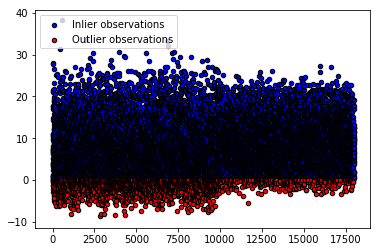

In [1]:

# Import necessary modules. 
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_classification

# Generate the dataset
X, Y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=10000, random_state=10)

# Resample the dataset. 
X_resampled, Y_resampled = SMOTE().fit_sample(X, Y) 

# Fit the model on the X_resampled dataset. 
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_resampled)
inlierstatus = clf.predict(X_resampled)
signeddist = clf.decision_function(X_resampled)

# Copy the outlier observations to a different NumPy array.
row = np.arange(len(X_resampled))
X_row = np.c_[row, X_resampled]
X_total = np.c_[X_row, signeddist]
X_merged = np.c_[X_total, inlierstatus]

X_merged_inlier = X_merged[inlierstatus == 1]
X_merged_outlier = X_merged[inlierstatus == -1]

# Plot the anomaly scores against the row #. 
b1 = plt.scatter(X_merged_inlier[:, 0], X_merged_inlier[:, 21], c='blue',
                s=20, edgecolor='k')
b2 = plt.scatter(X_merged_outlier[:, 0], X_merged_outlier[:, 21], c='red',
                s=20, edgecolor='k')


plt.legend([b1, b2],
           ["Inlier observations",
            "Outlier observations"],
           loc="upper left")
plt.show()



#### Outlier Detection Using Robust Covariance Estimation With MCD (Minimum Covariance Determinant)

covariance.EllipticEnvelope outlier detection algorithm fits a robust covariance estimate to the data and thus fits an ellipse to the central data points, ignoring points outside the central mode.

In [2]:

# Import necessary modules. 
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.covariance import MinCovDet
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_classification

# Generate the dataset
X, Y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

# Resample the dataset. 
X_resampled, Y_resampled = SMOTE().fit_sample(X, Y) 

# Fits a Minimum Covariance Determinant with the FastMCD algorithm.
robust_cov = MinCovDet().fit(X_resampled)

# Compute the Mahalanobis distances for the X_resampled dataset.
mahal_robust_cov = robust_cov.mahalanobis(X_resampled)

# Plot the observations' Mahalanobis distances.
plt.scatter(range(0, size(mahal_robust_cov)), np.sqrt(mahal_robust_cov))

C:\Users\bkalahas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
C:\Users\bkalahas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-46.067780743691848 > -48.086319007346894)
  % (det, previous_det), RuntimeWarning)
C:\Users\bkalahas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-47.161636230048877 > -49.024947425287579)
  % (det, previous_det), RuntimeWarning)
C:\Users\bkalahas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-46.726489992519127 > -46.949617481059910)
  % (det, previous_det), RuntimeWarning)
C:\Use

#### Outlier Detection Using Isolation Forest
One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. The ensemble.IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

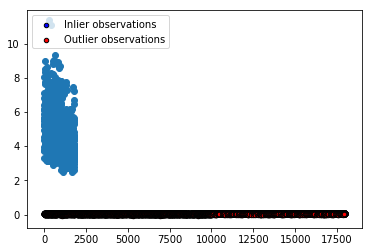

In [3]:

# Import necessary modules. 
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_classification

# Generate the dataset
X, Y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=10000, random_state=10)

# Resample the dataset. 
X_resampled, Y_resampled = SMOTE().fit_sample(X, Y) 

# Fits a IsolationForest model to the resampled dataset.
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)

# Fit the model on the X_resampled dataset.
clf.fit(X_resampled)
inlierstatus = clf.predict(X_resampled)
anomalyscore = clf.decision_function(X_resampled)

# Copy the outlier observations to a different NumPy array.
row = np.arange(len(X_resampled))
X_row = np.c_[row, X_resampled]
X_total = np.c_[X_row, anomalyscore]
X_merged = np.c_[X_total, inlierstatus]

X_merged_inlier = X_merged[inlierstatus == 1]
X_merged_outlier = X_merged[inlierstatus == -1]

# Plot the anomaly scores against the row #. 
b1 = plt.scatter(X_merged_inlier[:, 0], X_merged_inlier[:, 21], c='blue',
                s=20, edgecolor='k')
b2 = plt.scatter(X_merged_outlier[:, 0], X_merged_outlier[:, 21], c='red',
                s=20, edgecolor='k')


plt.legend([b1, b2],
           ["Inlier observations",
            "Outlier observations"],
           loc="upper left")
plt.show()

#### Outlier Detection Using Local Outlier Factor

The neighbors.LocalOutlierFactor (LOF) algorithm computes a score (called local outlier factor) reflecting the degree of abnormality of the observations. It measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors.

In practice, the local density is obtained from the k-nearest neighbors algorithm. The LOF score of an observation is equal to the ratio of the average local density of it's k-nearest neighbors, and its own local density: a normal instance is expected to have a local density similar to that of its neighbors, while abnormal data are expected to have much smaller local density.


In [ ]:

# Import necessary modules. 
import pandas as pd
from pandas import *
import numpy as np
from numpy import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import neighbors
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.datasets import make_classification

# Generate the dataset
X, Y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=10000, random_state=10)

# Resample the dataset. 
X_resampled, Y_resampled = SMOTE().fit_sample(X, Y) 

# Fit the model on the resampled dataset. 
clf = neighbors.LocalOutlierFactor(n_neighbors=20)
inlierstatus = clf.fit_predict(X_resampled)

# Copy the outlier observations to a different NumPy array.
row = np.arange(len(X_resampled))
X_row = np.c_[row, X_resampled]
X_merged = np.c_[X_row, inlierstatus]

X_merged_inlier = X_merged[inlierstatus == 1]
X_merged_outlier = X_merged[inlierstatus == -1]

# Plot the anomaly scores against the row #. 
b1 = plt.scatter(X_merged_inlier[:, 0], X_merged_inlier[:, 20], c='blue',
                s=20, edgecolor='k')
b2 = plt.scatter(X_merged_outlier[:, 0], X_merged_outlier[:, 20], c='red',
                s=20, edgecolor='k')


plt.legend([b1, b2],
           ["Inlier observations",
            "Outlier observations"],
           loc="upper left")
plt.show()


### Performance Evaluation
#### Performance Metrics For Outlier Detection Algorithms
A Fraud Detection application needs to decide whether a new observation belongs to the same distribution as existing observations (it is an inlier) or should be considered as different (it is an outlier). Since Outlier Detection algorithms are Unsupervised Learning mechanisms, evaluating whether an algorithm learned something useful is complicated. 

A major challenge in Unsupervised Learning is evaluating whether the algorithm learned something useful. Unsupervised Learning algorithms are usually applied to data that does not contain any label information. So, we don’t know what the right output should be. It is very hard to say whether a model “did well”. The only way to evaluate the result of an unsupervised algorithm is to inspect it manually.

We use the following metrics to evaluate the Outlier Detection results of the 4 Unsupervised Learning algorithms:  
(1) OneClassSVM: The decision_function() method returns the signed distance to the separating hyperplane.  
(2) MCD Estimator: The mahalanobis() method returns the square of the Mahalanobis distance for the observations.   
(3) IsolatedForest: The decision_function() method returns the anomaly score of the observations.    
(4) Local Outlier Factor: fit_predict() method only returns the inlier/outlier label (+1/-1) for the observations. The LOF score cannot be accessed.   

These are the results of the Outlier Detection for a sample size of 10000 from the 4 algorithms:   
(1) Local Outlier Factor algorithm: 
X_merged_inlier.shape
Out[2]: (16200, 22)

X_merged_outlier.shape
Out[3]: (1800, 22)

(2) OneClassSVM algorithm:
X_merged_inlier.shape
Out[6]: (16210, 23)

X_merged_outlier.shape
Out[7]: (1790, 23)

(3) Isolated Forest algorithm:
X_merged_inlier.shape
Out[2]: (16200, 23)

X_merged_outlier.shape
Out[3]: (1800, 23)

#### Conclusion
It can be seen that OneClassSVM algorithm has detected slightly fewer outlier transactions than either Local Outlier Factor algorithm or Isolated Forest algorithm. Based on this result, two kinds of production training models will be used:  
(1) A production training model that will test new observations based on Isolated Forest algorithm.  
(2) A production training model that will test new observations based on Local Outlier Factor algorithm.  



### References  

[1] Jha, S., Guillen, M., & Christopher Westland, J. (2012). Employing transaction aggregation strategy to detect credit card fraud. Expert Systems with Applications, 39(16), 12650-12657.   
http://doi.org/10.1016/j.eswa.2012.05.018  
[2] Panigrahi, S., Kundu, A., Sural, S., & Majumdar, A. K. (2009). Credit card fraud detection: A fusion approach using Dempster-Shafer theory and Bayesian learning. Information Fusion, 10(4), 354-363.   
http://doi.org/10.1016/j.inffus.2008.04.001  
[3] Brennan, P. (2012). A comprehensive survey of methods for overcoming the class imbalance problem in fraud detection, (June), 1-107.   
[4] Dal Pozzolo, A., Caelen, O., Le Borgne, Y. A., Waterschoot, S., Bontempi, G. (2014). Learned lessons in credit card fraud detection from a practitioner perspective. Expert Systems with Applications, 41(10), 4915-4928.  
http://doi:10.1016/j.eswa.2014.02.026.        
